In [114]:
using QuantumDynamics
using Plots
using LinearAlgebra

In [75]:
const thz2au = 0.0001519828500716
const invcm2au = 4.55633e-6
const au2fs = 0.02418884254
const mev2invcm = 8.066

8.066

In [76]:
struct fitsd <: SpectralDensities.AnalyticalSpectralDensity
    ωs :: Vector{Float64}
    jws :: Vector{Float64}
    ωmax :: Real
    Δs :: Real
    classical :: Bool
end

In [208]:
function evaluate(sd::fitsd, ω::Real)
    ωs = sd.ωs
    jws = sd.jws
    for i in 1:(size(ωs)[1]-1)
        if ω > ωs[i] && ω < ωs[i+1]
            return jws[i] + ((jws[i+1]-jws[i])/(ωs[i+1] - ωs[i]))*(ω - ωs[i])
        end
    end
    return 0.0
end

evaluate (generic function with 1 method)

In [209]:
function tabulate(sd::fitsd, full_real::Bool=true, npoints::Int=5)
    sd.ωs, sd.jws
end

tabulate (generic function with 3 methods)

In [210]:
(sd::fitsd)(ω::Real) = evaluate(sd, ω)

In [211]:
ϵb = 134.0
ϵ2b = -10.7

-10.7

In [212]:
N = 5

5

In [213]:
H0 = Matrix{ComplexF64}(zeros(N, N))

5×5 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im

In [214]:
for i in 1:N
    if i <= N-2
        H0[i, i+2] = ϵ2b
    end
    if i <= N-1
        H0[i, i+1] = ϵb
    end
    if i >= 2
        H0[i, i-1] = ϵb
    end
    if i>=3
        H0[i, i-2] = ϵ2b
    end
end

In [215]:
H0 = H0 * mev2invcm * invcm2au

5×5 Matrix{ComplexF64}:
         0.0+0.0im   0.00492468+0.0im  …          0.0+0.0im
  0.00492468+0.0im          0.0+0.0im             0.0+0.0im
 -0.00039324+0.0im   0.00492468+0.0im     -0.00039324+0.0im
         0.0+0.0im  -0.00039324+0.0im      0.00492468+0.0im
         0.0+0.0im          0.0+0.0im             0.0+0.0im

In [216]:
ωp = [57.8, 59.6, 89.0, 107.3, 139.1, 639.1, 1011.2, 1344.7, 1593.3] .* invcm2au
ωpg0p = [-1.7, 1.4, 1.6, -0.14, -2.3, -7.5, -3.6, 19.8, -42.0] .* mev2invcm * invcm2au
g0p = ωpg0p ./ ωp
jws = ((g0p.^(2))).*(π/2)

9-element Vector{Float64}:
 0.08840533583457472
 0.05638971040734254
 0.0330290638373194
 0.00017397744147897427
 0.027940728443197508
 0.014074118523305819
 0.0012952905349650741
 0.022157251289770124
 0.07101331406814211

In [217]:
Jw = SpectralDensities.ExponentialCutoff(; ξ=30.0, ωc=57.8*invcm2au, n=0.0, Δs=1.0)
#wm = maximum(ωp)
#Jw = fitsd(ωp, jws, ωmax, 1.0, false)

QuantumDynamics.SpectralDensities.ExponentialCutoff(30.0, 0.000263355874, 1.0, 0.0, 0.00790067622, false)

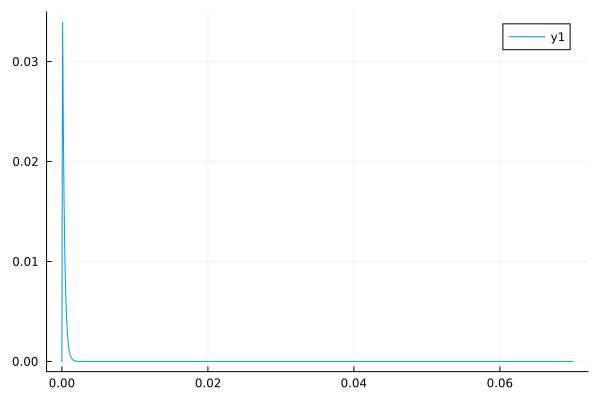

In [218]:
ω = 0:0.0001:0.07
plot(ω, Jw.(ω))

In [219]:
nsteps = 1000
dt = 0.25
ρ0 = Matrix{ComplexF64}(zeros(N, N))
ρ0[5, 5] = 1

β = 1 / (300 * 3.16683e-6) # T = 300K

1052.5772881188234

In [220]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H0, dt=dt, ntimes=nsteps)    
t, ρ = TTM.propagate(; fbU=fbU, Jw=[Jw], β=β, ρ0=ρ0, dt=dt, ntimes=nsteps, rmax=1, extraargs=QuAPI.QuAPIArgs(), path_integral_routine=QuAPI.build_augmented_propagator)

(0.0:0.25:250.0, [0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 2.3356839549582253e-17 + 0.0im -5.849085513614096e-16 + 7.496007551849714e-18im … 9.1439673753657e-14 + 5.949407606330199e-12im -4.8323133665745485e-9 + 7.450803474711432e-11im; … ; NaN + NaN*im NaN + NaN*im … NaN + NaN*im NaN + NaN*im; NaN + NaN*im NaN + NaN*im … NaN + NaN*im NaN + NaN*im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -5.849049782691049e-16 - 7.495961760201024e-18im 1.4649850330073442e-14 + 0.0im … -3.804899523012335e-13 - 1.4901608625488864e-10im 1.2103606388002074e-7 - 3.1499677704061073e-10im; … ; NaN + NaN*im NaN + NaN*im … NaN + NaN*im NaN + NaN*im; NaN + NaN*im NaN + NaN*im … NaN + NaN*im NaN + NaN*im;;; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; -3.662486671751067e-15 + 4.751176044276569e-13im -6.076481556109794e-14 - 1.1899276911457998e-11im … -1.2103608666682988e-7 + 9.271419158114157e-10im -7.578895158636128e-7 - 9.830970741753693e-5im; … ; NaN + NaN*im NaN + NaN*im … NaN + N

In [184]:
MSD = []
for i in 1:nsteps
    s = 0.0
    for j in 1:N
        s += real(ρ[i, j, j])*((j-5)^2)
    end
    push!(MSD, s)
end

In [185]:
display("text/plain", MSD)

1000-element Vector{Any}:
  0.0
  1.5544409050467987e-6
  6.032691311379562e-6
  1.3666771361511161e-5
  2.4610295668467445e-5
  3.818505427759786e-5
  5.2644976174494224e-5
  7.018229760476108e-5
  9.079727266454965e-5
  0.00011449016230526006
  0.00014126128654014423
  0.00017111112588891035
  0.00020404017132552154
  ⋮
 -0.01410162895187228
 -0.027161077240271725
 -0.04033059335533884
 -0.05361073005961048
 -0.06700204162194812
 -0.08050508381453447
 -0.09412041390980685
 -0.10784859067731412
 -0.12169017438051455
 -0.13564572677349918
 -0.14971581109765353
 -0.16390099207824038

In [186]:
μ = β * (MSD[20] - MSD[1])/(t[20] - t[1])

0.11541022936396024

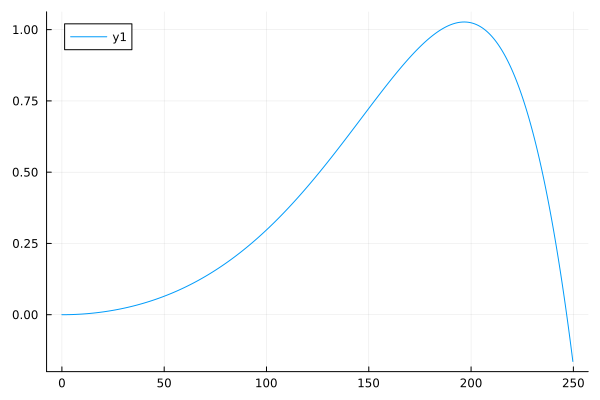

In [187]:
plot(t[1:nsteps], MSD, fmt= :png)

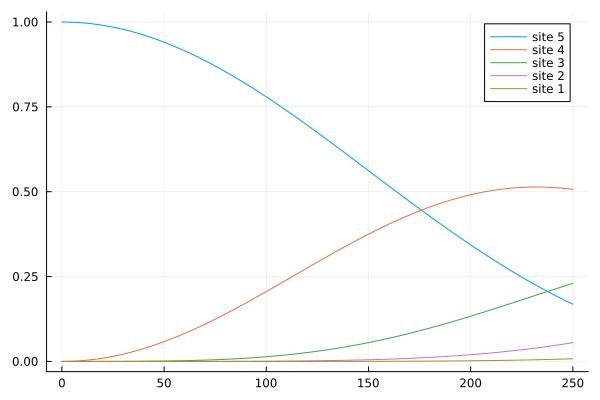

In [201]:
plot(t, real.(ρ[:, 5, 5]), label="site 5")
plot!(t, real.(ρ[:, 4, 4]), label="site 4")
plot!(t, real.(ρ[:, 3, 3]), label="site 3")
plot!(t, real.(ρ[:, 2, 2]), label="site 2")
plot!(t, real.(ρ[:, 1, 1]), label="site 1")